Deep Reinforcement Learning
# CNN - Convolutional Neural Network

We'll now apply the CNN to mnist. In the CNN we have other operation layer as: 

- Convolutional layers
- Max pooling layers

These layers help for the feature extraction

In the Convolutional layer (that could be of differetn dimensions  in this example 2D - image) we "increase the features and in the Pooling we decrease the features taking the maximum value in submatrixs

https://en.wikipedia.org/wiki/Convolution

In [2]:
import numpy as np
import pandas as pd
from keras import models,layers
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.utils import to_categorical

Using TensorFlow backend.
/Users/luigibungaro/dsr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()
train_images = train_images.reshape(60000,28,28,1)
print(train_images.shape)
train_labels = to_categorical(train_labels)

(60000, 28, 28, 1)


In [4]:
model = models.Sequential()
#the first element of conv2D is the dimensionality of the output space 
#(i.e. the number of output filters in the convolution)
#Number of parameters is filter multiplied for the feature maps of output --> 3*3*32 weights + 32 bias = 320
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))  #no parameter to learn in the pooling layer
#Number of parameters is 3*3*32 (input) *64 (output) weights +64 bias
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))   #classification in 10 classes of images

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [5]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

In [6]:
history = model.fit(train_images,train_labels,batch_size=32,epochs=5,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 53s 1ms/step - loss: 1.6636 - acc: 0.8619 - val_loss: 0.0769 - val_acc: 0.9782
Epoch 2/5
48000/48000 [==============================] - 52s 1ms/step - loss: 0.0637 - acc: 0.9804 - val_loss: 0.0973 - val_acc: 0.9727
Epoch 3/5
48000/48000 [==============================] - 53s 1ms/step - loss: 0.0449 - acc: 0.9862 - val_loss: 0.0528 - val_acc: 0.9842
Epoch 4/5
48000/48000 [==============================] - 53s 1ms/step - loss: 0.0399 - acc: 0.9883 - val_loss: 0.0639 - val_acc: 0.9828
Epoch 5/5
48000/48000 [==============================] - 58s 1ms/step - loss: 0.0370 - acc: 0.9883 - val_loss: 0.0567 - val_acc: 0.9847


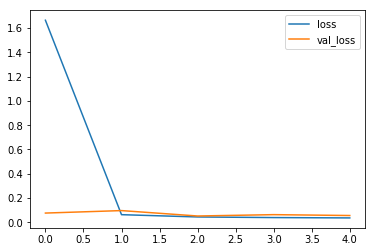

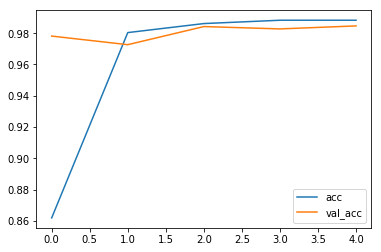

In [7]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
plt.close()

plt.plot(history.history['acc'],label='acc')
plt.plot(history.history['val_acc'],label='val_acc')
plt.legend()
plt.show()
plt.close()

In [8]:
#Let's reshape the test images and make categorical the labels so we can evaluate the model 
# on the test set
test_images = test_images.reshape(10000, 28, 28,1)
test_labels = to_categorical(test_labels)

In [9]:
model.evaluate(test_images,test_labels)  #we need to change the shapes

10000/10000 [==============================] - 3s 293us/step


[0.04985748035125434, 0.987]

In [ ]:
#Compared to the NN, the accuracy is slightly higher in the CNN